In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.1/288.1 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.2/137.2 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 k

In [ ]:
!pip install segmentation_models_pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 kB 24.9 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16427 sha256=91d1f9017ffdf9bbd2d74f567ca210a7d3ac6b03a743ccfb0494b6a6005d61c4
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60945 sha256=729db3082c64b89ae7ec8388077302dcc37910a307ff2fe4d3c10a5b97868b02
  Stored in directory: /root/.cache/pip/wheels/35/cb/a5/8f534c60142835bfc889f9a482e4a67e0b817032d9c6883b64
Successfully bu

In [ ]:
import torch.nn as nn
DEVICE = 'cpu'
device = DEVICE
EPOCHS = 10
LR = 0.003
IMAGE_HEIGHT = 320
IMAGE_WIDTH = 320
BATCH_SIZE = 8
ENCODER = 'resnet50'
WEIGHTS = 'imagenet'
class DeepLabV3Model (nn.Module):
    def __init__(self):
        super (DeepLabV3Model , self).__init__()

        self.arc = smp.DeepLabV3Plus(
            encoder_name= ENCODER , # loading pre-trained model
            encoder_weights=  WEIGHTS , # loading pre-trained weights
            in_channels= 3 ,
            classes=  4,
            activation = 'softmax'
        )



    def forward(self, images, masks=None):
        logits = self.arc(images)

        if masks is not None:
            masks = masks.squeeze(1) # remove the channel dimension
            criterion = nn.CrossEntropyLoss()
            loss = criterion(logits, masks)
            return logits, loss

        return logits

In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import segmentation_models_pytorch as smp
import numpy as np
import cv2
# Load the saved PyTorch model from the .pth file
state_dict = torch.load('/content/drive/MyDrive/deployable_model.pth')
model = DeepLabV3Model()
model.load_state_dict(state_dict)

# Set the model to evaluation mode
model.eval()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 136MB/s]


DeepLabV3Model(
  (arc): DeepLabV3Plus(
    (encoder): ResNetEncoder(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu

In [ ]:
def mask_to_rgb(mask):
    color_map={
    0: (0, 0, 0),  # Background
    1: (255,0,0),  # Class 1
    2: (0,255,0),   # Class 2
    3: (0,0,255),  # Class 3 # Class 5
    }
    if isinstance(mask, torch.Tensor):
        mask = mask.detach().cpu().numpy()
    # Create a new numpy array to hold the RGB mask
    rgb_mask = np.zeros((320, 320, 3), dtype=np.uint8)

    for row in range(320):
        for column in range(320):
            class_index = mask[0][row][column]
            rgb_mask[row][column] = color_map[class_index]

    return rgb_mask

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/segmentation_models_pytorch/base/modules.py:116: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.activation(x)


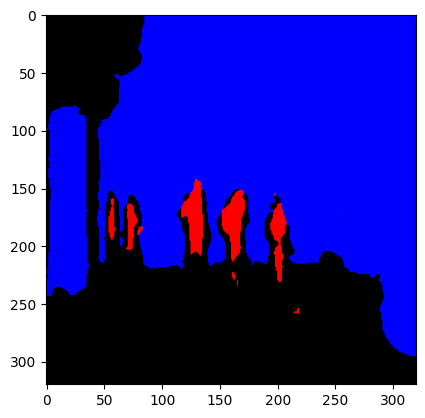

In [ ]:
import matplotlib.pyplot as plt
import torchvision.transforms.functional as fn
import torchvision
def get_segmentation(image_path):
  image = cv2.imread(image_path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  image = np.transpose(image ,(2,0,1)).astype(np.float32)

  original_image = torchvision.transforms.Resize((320, 320))(torch.Tensor(image))
  image = original_image/255.0 # normalizing original image tensor [0,1] range
  logits_mask = model(image.to(DEVICE).unsqueeze (0)) #(C, H, W) -> (1, C, H, W)
  pred_mask_prob = torch.softmax(logits_mask, dim=1)  # (batch_size, num_classes, height, width)
  _, pred_mask = torch.max(pred_mask_prob, dim=1)
  plt.imshow(mask_to_rgb(pred_mask))
image_path = '/content/drive/MyDrive/inputs/10.jpg'
get_segmentation(image_path)

## Gradio code

In [ ]:
import gradio as gr
import matplotlib.pyplot as plt
import numpy as np

# Define your function that performs image segmentation
def perform_segmentation(image):
    # image = cv2.imread(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    image = np.transpose(image ,(2,0,1)).astype(np.float32)

    original_image = torchvision.transforms.Resize((320, 320))(torch.Tensor(image))
    image = original_image/255.0 # normalizing original image tensor [0,1] range
    logits_mask = model(image.to(DEVICE).unsqueeze (0)) #(C, H, W) -> (1, C, H, W)
    pred_mask_prob = torch.softmax(logits_mask, dim=1)  # (batch_size, num_classes, height, width)
    _, pred_mask = torch.max(pred_mask_prob, dim=1)
    plt.imshow(mask_to_rgb(pred_mask))
    plt.axis('off')
    plt.tight_layout()
    # Convert the Matplotlib plot to a NumPy array
    fig = plt.gcf()
    fig.canvas.draw()
    output_image = np.array(fig.canvas.renderer._renderer)
    plt.close()
    # Return the segmented image as a NumPy array
    output_image = Image.fromarray(output_image)

# Return the segmented image as a PIL image object
    return output_image

# Define the Gradio interface
input_image = gr.inputs.Image(label="Input Image")
output_image = gr.outputs.Image(type='pil',label="Segmented Image")

# Define the Gradio app
app = gr.Interface(fn=perform_segmentation, inputs=input_image, outputs=output_image)

# Launch the app
app.launch()




/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:43: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>